In [1]:
from glob import glob
from gzip import open # NB: overrides standard open()
import os
import math
import functools
import numpy as np
import scipy.interpolate
from scipy import interpolate
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec

In [3]:
columns_=np.load('column_marat.npz')
rows_=np.load('row_marat.npz')
X_=np.load('Xzero_marat.npz')

In [ ]:
X_.files,rows_.files,columns_.files

(['arr_0'], ['arr_0'], ['arr_0'])

In [141]:
X_=X_['arr_0']
rows_=rows_['arr_0']
columns_=columns_['arr_0']

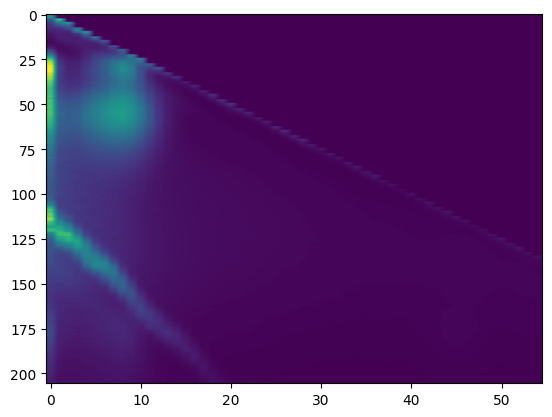

In [ ]:
plt.imshow(X_[0,:,:],aspect='auto')
plt.show()

In [ ]:
drows=rows_[1]-rows_[0]
hier_rows=np.array([(i*drows)+rows_[0] for i in range(-15,0)])
lowe_rows=np.array([(i*drows)+rows_[-1] for i in range(1,6)])
rows=np.concatenate((hier_rows,rows_,lowe_rows),axis=0)
rows.shape

(226,)

In [ ]:
X_high=np.zeros([35,15,55])
X_low=np.zeros([35,5,55])

In [ ]:
Xcon=np.concatenate((X_high,X_,X_low),axis=1)
Xcon.shape,X_.shape

((35, 226, 55), (35, 206, 55))

In [159]:
arr1=[i+13*drows for i in columns_]
arr2=[i-2*drows for i in columns_]
arr3=[2*i-20*drows for i in columns_[:21]]
arr4=[2*i+105*drows for i in columns_[:10]]

NameError: ignored

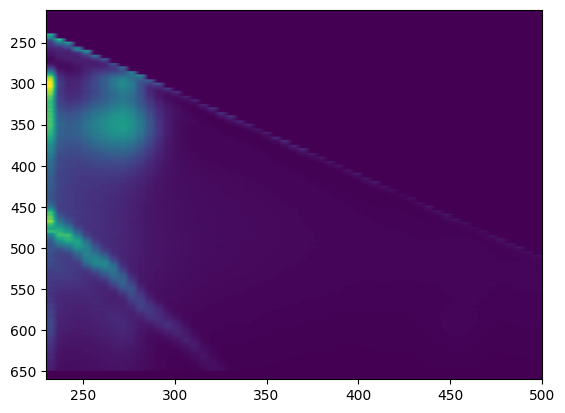

In [160]:
plt.imshow(Xcon[0,:,:],aspect='auto',extent=[columns_[0],columns_[-1],rows[-1],rows[0]])
# plt.plot(columns_,arr1,"red")
# plt.plot(columns_,arr2,"red")
# plt.plot(columns_[:21],arr3,"red")
plt.show()


In [4]:
BoolMaratMatrix=np.load('bool_marat_mete_version.npz')

In [5]:
BoolMaratMatrix.files

['matrix', 'rows', 'Xcon']

In [6]:
BoolMaratMatrix_=BoolMaratMatrix['matrix']
rows=BoolMaratMatrix['rows']
Xcon=BoolMaratMatrix['Xcon']

In [ ]:
arr1[15],arr2[15],arr3[0],rows_[-1],rows[-1],drows,columns_[15]

(331, 301, 420, 650, 660, 2, 305)

In [340]:
num=23

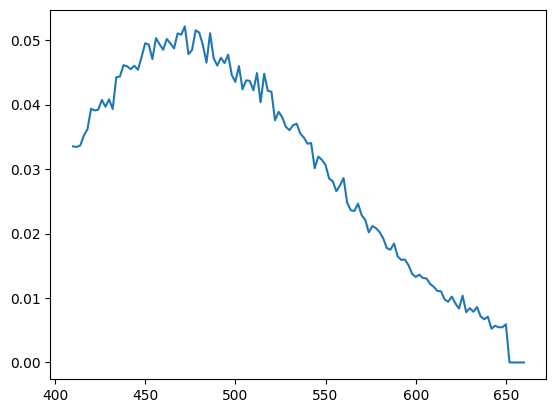

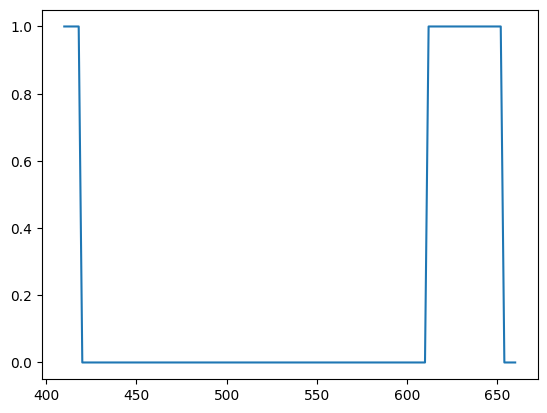

In [341]:
plt.plot(rows[100:],Xcon[3,100:,num])
plt.show()
plt.plot(rows[100:],BoolMaratMatrix_[100:,num])
plt.show()

In [288]:
rows[40],rows[57]

(290, 324)

In [325]:
# BoolMaratMatrix_[40:57,num]=1
BoolMaratMatrix_[201:222,num]=1

In [251]:
BoolMaratMatrix_[:2,num]=0
BoolMaratMatrix_[5:,num]=0

In [ ]:
?np.savez

In [334]:
np.savez('bool_marat_mete_version_2.npz',matrix=BoolMaratMatrix_,rows=rows,
         Xcon=Xcon)

In [ ]:
def secondBadLine(column_value):
  cons=6400
  return  1/((1/column_value) - (cons/1e7))

In [ ]:
secondBadLine(305)

378.9761431411531

In [ ]:
BoolMaratMatrix=np.zeros([226,55])

In [ ]:
arr1_=[i+13+10 for i in range(55)]
arr2_=[i-2+10 for i in range(55)]

In [ ]:
def firstBoolfunc(oneSpectum):
  # print(oneSpectum[:,0].shape)
  k=0
  lowCel=8
  for i in range(55):
    oneSpectum[lowCel:lowCel+15,i]=1
    if k==0:
      lowCel+=2
      k=1
    else:
      lowCel+=3
      k=0
  return oneSpectum

In [ ]:
firstBoolfunc(BoolMaratMatrix,0)

(226,)


In [ ]:
BoolMaratMatrix_=firstBoolfunc(BoolMaratMatrix)

In [ ]:
BoolMaratMatrix_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
rows[0],drows,columns_[0],rows[23],drows,columns_[2],arr1[0]

(210, 2, 230, 256, 2, 240, 256)

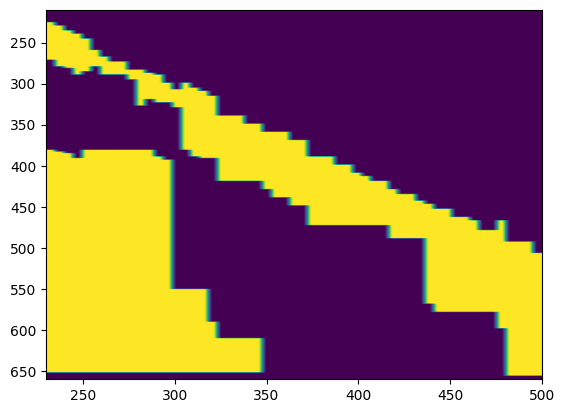

In [329]:
plt.imshow(BoolMaratMatrix_,aspect='auto',extent=[columns_[0],columns_[-1],rows[-1],rows[0]])
# plt.plot(columns_,arr1,"red")
# plt.plot(columns_,arr2,"red")
plt.show()

In [338]:
boolIntervalDict=dict()

In [483]:
def boolIntervalFirst(XBool,boolDict):
  # for i in range(24):
  for i in range(24,55):
    boolDict[i]=list()
    for j in range(1,225):
      if (XBool[j,i]==1 and XBool[j-1,i]==0):
        boolDict[i].append(j-1)
      if (XBool[j,i]==0 and XBool[j-1,i]==1):
        boolDict[i].append(j)
  return boolDict


In [484]:
boolIntervalDict=boolIntervalFirst(BoolMaratMatrix_,boolIntervalDict)
boolIntervalDict

{0: [7, 31, 85, 222],
 1: [9, 35, 86, 222],
 2: [12, 36, 87, 222],
 3: [14, 40, 90, 222],
 4: [17, 38, 85, 222],
 5: [24, 35, 85, 222],
 6: [28, 40, 85, 222],
 7: [31, 40, 85, 222],
 8: [31, 40, 85, 222],
 9: [36, 43, 85, 222],
 10: [36, 59, 85, 222],
 11: [38, 55, 85, 222],
 12: [39, 57, 89, 222],
 13: [44, 57, 91, 222],
 14: [48, 60, 170, 222],
 15: [44, 86, 170, 222],
 16: [47, 90, 170, 222],
 17: [49, 91, 170, 222],
 18: [52, 91, 190, 222],
 19: [50, 105, 200, 222],
 20: [64, 105, 200, 222],
 21: [64, 105, 200, 222],
 22: [69, 105, 200, 222],
 23: [69, 105, 200, 222],
 24: [74, 110],
 25: [74, 115],
 26: [74, 115],
 27: [79, 120],
 28: [79, 120],
 29: [89, 132],
 30: [89, 132],
 31: [89, 132],
 32: [94, 132],
 33: [94, 132],
 34: [99, 132],
 35: [101, 132],
 36: [104, 132],
 37: [104, 132],
 38: [109, 140],
 39: [112, 140],
 40: [112, 140],
 41: [116, 140],
 42: [118, 180],
 43: [121, 185],
 44: [121, 185],
 45: [126, 185],
 46: [126, 185],
 47: [128, 185],
 48: [134, 185],
 49: [1

In [490]:
boolIntervalDict[29]=[80,132]

In [485]:
boolIntervalDict[51]=[141, 222]
boolIntervalDict[52]=[141, 222]
boolIntervalDict[53]=[141, 222]
boolIntervalDict[54]=[148, 222]

In [413]:
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline, PchipInterpolator, Akima1DInterpolator

In [486]:
def interpolate(X_,rowsNp,boolDict):
  X=X_[0]
  X2=X_[1]
  X3=X_[2]
  # X=X_.copy()
  # X2=X_.copy()
  # X3=X_.copy()
  for i in range(35):
    for j in range(24,55):
      a=boolDict[j][0]
      b=boolDict[j][1]

      # c=boolDict[j][2]
      # d=boolDict[j][3]

      firstY=X[i,a-6:a+1,j]
      firstX=rowsNp[a-6:a+1]
      secondY=X[i,b:b+4,j]
      secondX=rowsNp[b:b+4]
      fY1=np.concatenate((firstY,secondY),axis=0)
      fX1=np.concatenate((firstX,secondX),axis=0)
      equi1=scipy.interpolate.PchipInterpolator(fX1,fY1)
      new_data1=equi1(rowsNp[a+1:b]).astype(float)
      X[i,a+1:b,j]=new_data1
      X2[i,a+1:b,j]=new_data1
      X3[i,a+1:b,j]=new_data1

      # f2 = CubicSpline(fX1,fY1)
      # new_data1c=f2(rowsNp[a+1:b]).astype(float)

      # f3 = Akima1DInterpolator(fX1,fY1)
      # new_data1s=f3(rowsNp[a+1:b]).astype(float)

      # f2 = CubicSpline(fX1,fY1)
      # new_data1c=f2(rowsNp[a+1:b]).astype(float)
      # print(new_data1c,new_data1,rowsNp[a+1:b])

      # firstY1=X[i,c-16:c+1,j]
      # firstX1=rowsNp[c-16:c+1]
      # secondY1=X[i,d:d+4,j]
      # secondX1=rowsNp[d:d+4]
      # thirdX1=rowsNp[c+7:c+9]
      # thirdY1=np.array([1e-2*firstY1[-1],1e-3*firstY1[-1]])
      # # print(thirdY1,thirdY1.shape,secondY1.shape)
      # fY2=np.concatenate((firstY1,thirdY1,secondY1),axis=0)
      # fX2=np.concatenate((firstX1,thirdX1,secondX1),axis=0)
      # equi2=scipy.interpolate.PchipInterpolator(fX2,fY2)
      # new_data2=equi2(rowsNp[c+1:d]).astype(float)
      # X[i,c+1:d,j]=new_data2

      # fY3=np.concatenate((firstY1,secondY1),axis=0)
      # fX3=np.concatenate((firstX1,secondX1),axis=0)
      # equi3=scipy.interpolate.PchipInterpolator(fX3,fY3)
      # new_data3=equi3(rowsNp[c+1:d]).astype(float)
      # X2[i,c+1:d,j]=new_data3

      # fourX1=rowsNp[c+7:c+9]
      # fourY1=np.array([0.15*firstY1[-1],0.12*firstY1[-1]])
      # fY4=np.concatenate((firstY1,fourY1,secondY1),axis=0)
      # fX4=np.concatenate((firstX1,fourX1,secondX1),axis=0)
      # equi4=scipy.interpolate.PchipInterpolator(fX4,fY4)
      # new_data4=equi4(rowsNp[c+1:d]).astype(float)
      # X3[i,c+1:d,j]=new_data4


      # plt.plot(rowsNp,X[i,:,j],"red")
      # plt.plot(rowsNp,X2[i,:,j],"green")
      # plt.plot(rowsNp,X3[i,:,j],"blue")
      # plt.show()
      # print(X[i,c+1:d,j],new_data2,rowsNp[c+1:d])
    #   break
    # break

    #   print(X[i,:,j])
    #   plt.plot(X[i,:,j])
    #   plt.show()
    #   break
    # break
  return [X,X2,X3]



In [491]:
result_=interpolate(result,rows,boolIntervalDict)
# result=interpolate(Xcon,rows,boolIntervalDict)

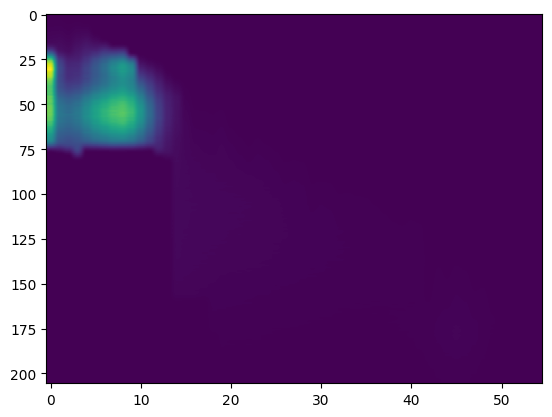

In [500]:
plt.imshow(fresult[0][22,:,:],aspect='auto')
plt.show()

In [496]:
fresult=list()
for i in range(3):
  fresult.append(result_[i][:,15:-5,:])

In [497]:
result_[0].shape,fresult[0].shape

((35, 226, 55), (35, 206, 55))

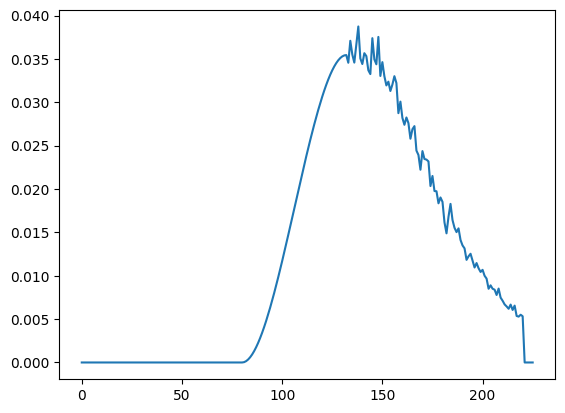

In [494]:
plt.plot(result_[0][2,:,29])
plt.show()

In [373]:
rows[-1]

660

In [502]:
np.savez('X_marat_2023.npz',x1=fresult[0],x2=fresult[1],x3=fresult[2],rows=rows_,column=columns_)
# np.savez('newXresoult_marat.npz',x1=result[0],x2=result[1],x3=result[2],rows=rows,column=columns_)

In [501]:
rows_.shape

(206,)

In [410]:
rows_1=rows-220
rows_1

array([-10,  -8,  -6,  -4,  -2,   0,   2,   4,   6,   8,  10,  12,  14,
        16,  18,  20,  22,  24,  26,  28,  30,  32,  34,  36,  38,  40,
        42,  44,  46,  48,  50,  52,  54,  56,  58,  60,  62,  64,  66,
        68,  70,  72,  74,  76,  78,  80,  82,  84,  86,  88,  90,  92,
        94,  96,  98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118,
       120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144,
       146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170,
       172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196,
       198, 200, 202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222,
       224, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248,
       250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274,
       276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300,
       302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326,
       328, 330, 332, 334, 336, 338, 340, 342, 344, 346, 348, 35